In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 19.1 MB/s eta 0:00:0000:01


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 33.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you h

In [4]:
from roboflow import Roboflow

rf = Roboflow(api_key="y9YNcMgvLEe47MLcwwey")
project = rf.workspace("delakoka").project("fruits-detection-81orq")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.51, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fruits-Detection-2 in yolov8:: 100%|██████████| 612/612 [00:00<00:00, 8056.60it/s]


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model.train(data="/kaggle/input/data-yaml/data.yaml", epochs=50, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 103MB/s]


Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/data-yaml/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]
2024-07-09 15:19:30,246	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-09 15:19:31,023	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/Fruits-Detection-2/train/labels... 210 images, 23 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<00:00, 1348.55it/s]

train: New cache created: /kaggle/working/Fruits-Detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Fruits-Detection-2/test/labels... 30 images, 6 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 1208.29it/s]

val: New cache created: /kaggle/working/Fruits-Detection-2/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.39G      1.167      3.261        1.6          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         30         46    0.00509      0.985      0.284      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.3G      1.145      2.364      1.518         13        640: 100%|██████████| 14/14 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         30         46      0.125      0.896      0.367      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.32G      1.124      1.977      1.463          9        640: 100%|██████████| 14/14 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         30         46      0.499      0.511      0.516      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.34G      1.216      1.908      1.593          2        640: 100%|██████████| 14/14 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         30         46      0.491      0.513      0.551      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.3G      1.119      2.078      1.478          1        640: 100%|██████████| 14/14 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         30         46      0.454      0.693      0.647       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.34G      1.157      1.704      1.497         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         30         46      0.414      0.617      0.468      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.33G      1.199      1.916      1.584          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         30         46      0.633      0.594      0.659      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.34G      1.137      1.682      1.465         12        640: 100%|██████████| 14/14 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         30         46      0.846      0.526      0.591      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.33G      1.097      1.581      1.429          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         30         46      0.918      0.341      0.477      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.34G      1.109      1.545      1.443          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         30         46      0.517      0.685      0.576      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.34G      1.151      1.639      1.468          2        640: 100%|██████████| 14/14 [00:01<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         30         46       0.43      0.591      0.558      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.34G      1.132      1.634      1.471          2        640: 100%|██████████| 14/14 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         30         46      0.597      0.807      0.717      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.32G       1.07      1.495      1.382         11        640: 100%|██████████| 14/14 [00:01<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         30         46      0.538      0.678      0.549      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.34G      1.084      1.373      1.398         12        640: 100%|██████████| 14/14 [00:01<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         30         46      0.592      0.685       0.62      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.31G      1.094      1.377      1.411          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         30         46      0.608      0.589      0.659      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.32G      1.017      1.361       1.36          3        640: 100%|██████████| 14/14 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         30         46      0.693      0.414      0.581      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.32G      1.019      1.309      1.375         17        640: 100%|██████████| 14/14 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         30         46      0.587      0.514      0.606      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.3G      1.088      1.417       1.46          2        640: 100%|██████████| 14/14 [00:01<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         30         46      0.772      0.471      0.691      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.34G      1.085      1.345      1.438          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         30         46      0.689      0.623      0.609      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G     0.9883      1.326      1.372          3        640: 100%|██████████| 14/14 [00:02<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         30         46      0.757      0.813      0.822      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.34G      1.009      1.182      1.374          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         30         46      0.761      0.759      0.807      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.33G      1.029      1.232      1.365         16        640: 100%|██████████| 14/14 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         30         46      0.622      0.628      0.696      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.32G     0.9647      1.106      1.292         12        640: 100%|██████████| 14/14 [00:01<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         30         46      0.583      0.708      0.715      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.32G     0.9886      1.162      1.346          5        640: 100%|██████████| 14/14 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         30         46      0.623      0.615       0.63      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.33G      1.008      1.179      1.376          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         30         46      0.681      0.802       0.71      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.3G      0.968        1.2      1.351          8        640: 100%|██████████| 14/14 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         30         46      0.716      0.843      0.825      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.34G      0.943      1.115      1.322          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         30         46      0.689       0.85      0.833      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.34G      1.035      1.146      1.382          4        640: 100%|██████████| 14/14 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         30         46      0.715      0.832      0.821      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.32G     0.9839      1.075      1.315         14        640: 100%|██████████| 14/14 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         30         46      0.762      0.896       0.83      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.32G     0.9218      1.061      1.317         10        640: 100%|██████████| 14/14 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         30         46      0.737      0.811      0.778      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.34G     0.9081      1.036       1.28          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         30         46      0.761      0.781      0.764      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.32G          1      1.038      1.383          4        640: 100%|██████████| 14/14 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         30         46      0.683      0.851      0.784       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.3G     0.8982     0.9665      1.269          6        640: 100%|██████████| 14/14 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         30         46      0.756      0.819       0.78      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.33G     0.8638     0.9586      1.234         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         30         46      0.683      0.816      0.773       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.3G     0.8765     0.9921       1.27          7        640: 100%|██████████| 14/14 [00:02<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         30         46       0.65      0.786      0.714      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.32G     0.8571     0.9554      1.236          7        640: 100%|██████████| 14/14 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         30         46       0.77      0.798       0.76      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.34G     0.8587     0.9778       1.25         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         30         46      0.796      0.767      0.777      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.33G     0.8388     0.8812      1.252          4        640: 100%|██████████| 14/14 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all         30         46      0.792      0.806      0.756      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.3G     0.8792     0.9316       1.26          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         30         46      0.749      0.791      0.758      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.31G     0.8463      1.203      1.271          1        640: 100%|██████████| 14/14 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         30         46       0.81      0.714      0.775      0.571


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G     0.7289     0.9468      1.206          4        640: 100%|██████████| 14/14 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         30         46      0.778      0.705      0.764       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.3G     0.7747     0.9997      1.243          5        640: 100%|██████████| 14/14 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         30         46      0.639      0.812      0.762      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.3G     0.7232     0.8986      1.165          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         30         46       0.75       0.84      0.834      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G     0.7128     0.9902      1.233          2        640: 100%|██████████| 14/14 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         30         46      0.697      0.905      0.848       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.3G     0.7148     0.7925      1.214          4        640: 100%|██████████| 14/14 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         30         46      0.774      0.791      0.845      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.3G     0.7374     0.8922      1.208          2        640: 100%|██████████| 14/14 [00:02<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         30         46      0.683      0.854      0.826      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.31G     0.6782     0.7694      1.134          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         30         46      0.762      0.878      0.852       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.34G     0.6638     0.8145      1.158          6        640: 100%|██████████| 14/14 [00:02<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         30         46      0.782      0.778       0.84      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.3G     0.6577     0.7913      1.159          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


                   all         30         46      0.775      0.791      0.824        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.3G     0.6261     0.8489      1.143          1        640: 100%|██████████| 14/14 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         30         46      0.775      0.791      0.818       0.61

50 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         30         46      0.774      0.791      0.846      0.633
                 apple          8         15      0.814          1      0.971      0.807
                banana          5          9        0.7      0.556      0.672       0.42
                orange         11         22      0.808      0.818      0.894      0.672
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▂▃▄▅▇███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▂▃▄▅▇███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg2,▂▃▄▅▇███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
metrics/mAP50(B),▁▂▄▄▃▆▅▃▄▆▄▅▅▅▆▅▇▆▆▅████▇▇▇▇▇▇▇▇▇▇██████
metrics/mAP50-95(B),▁▂▄▃▃▅▃▃▃▅▄▅▃▄▅▅▆▅▆▅▇▇▆▆▇▇▇▇▇▇▆▆▇▆██████
metrics/precision(B),▁▂▅▅▄▆▇█▄▆▅▆▆▅▇▆▇▆▅▆▆▆▆▇▇▆▇▆▇▇▇▇▇▆▇▆▆▇▇▇
metrics/recall(B),█▇▃▃▄▄▃▁▄▆▅▅▂▃▂▄▆▄▅▄▆▇▆▇▆▇▆▆▆▆▆▆▅▆▆▇▇▇▆▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▇▇█▇█▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▆▅▄▅▄▄▄▄▄▄▂▃▂▂▂▂▁▁


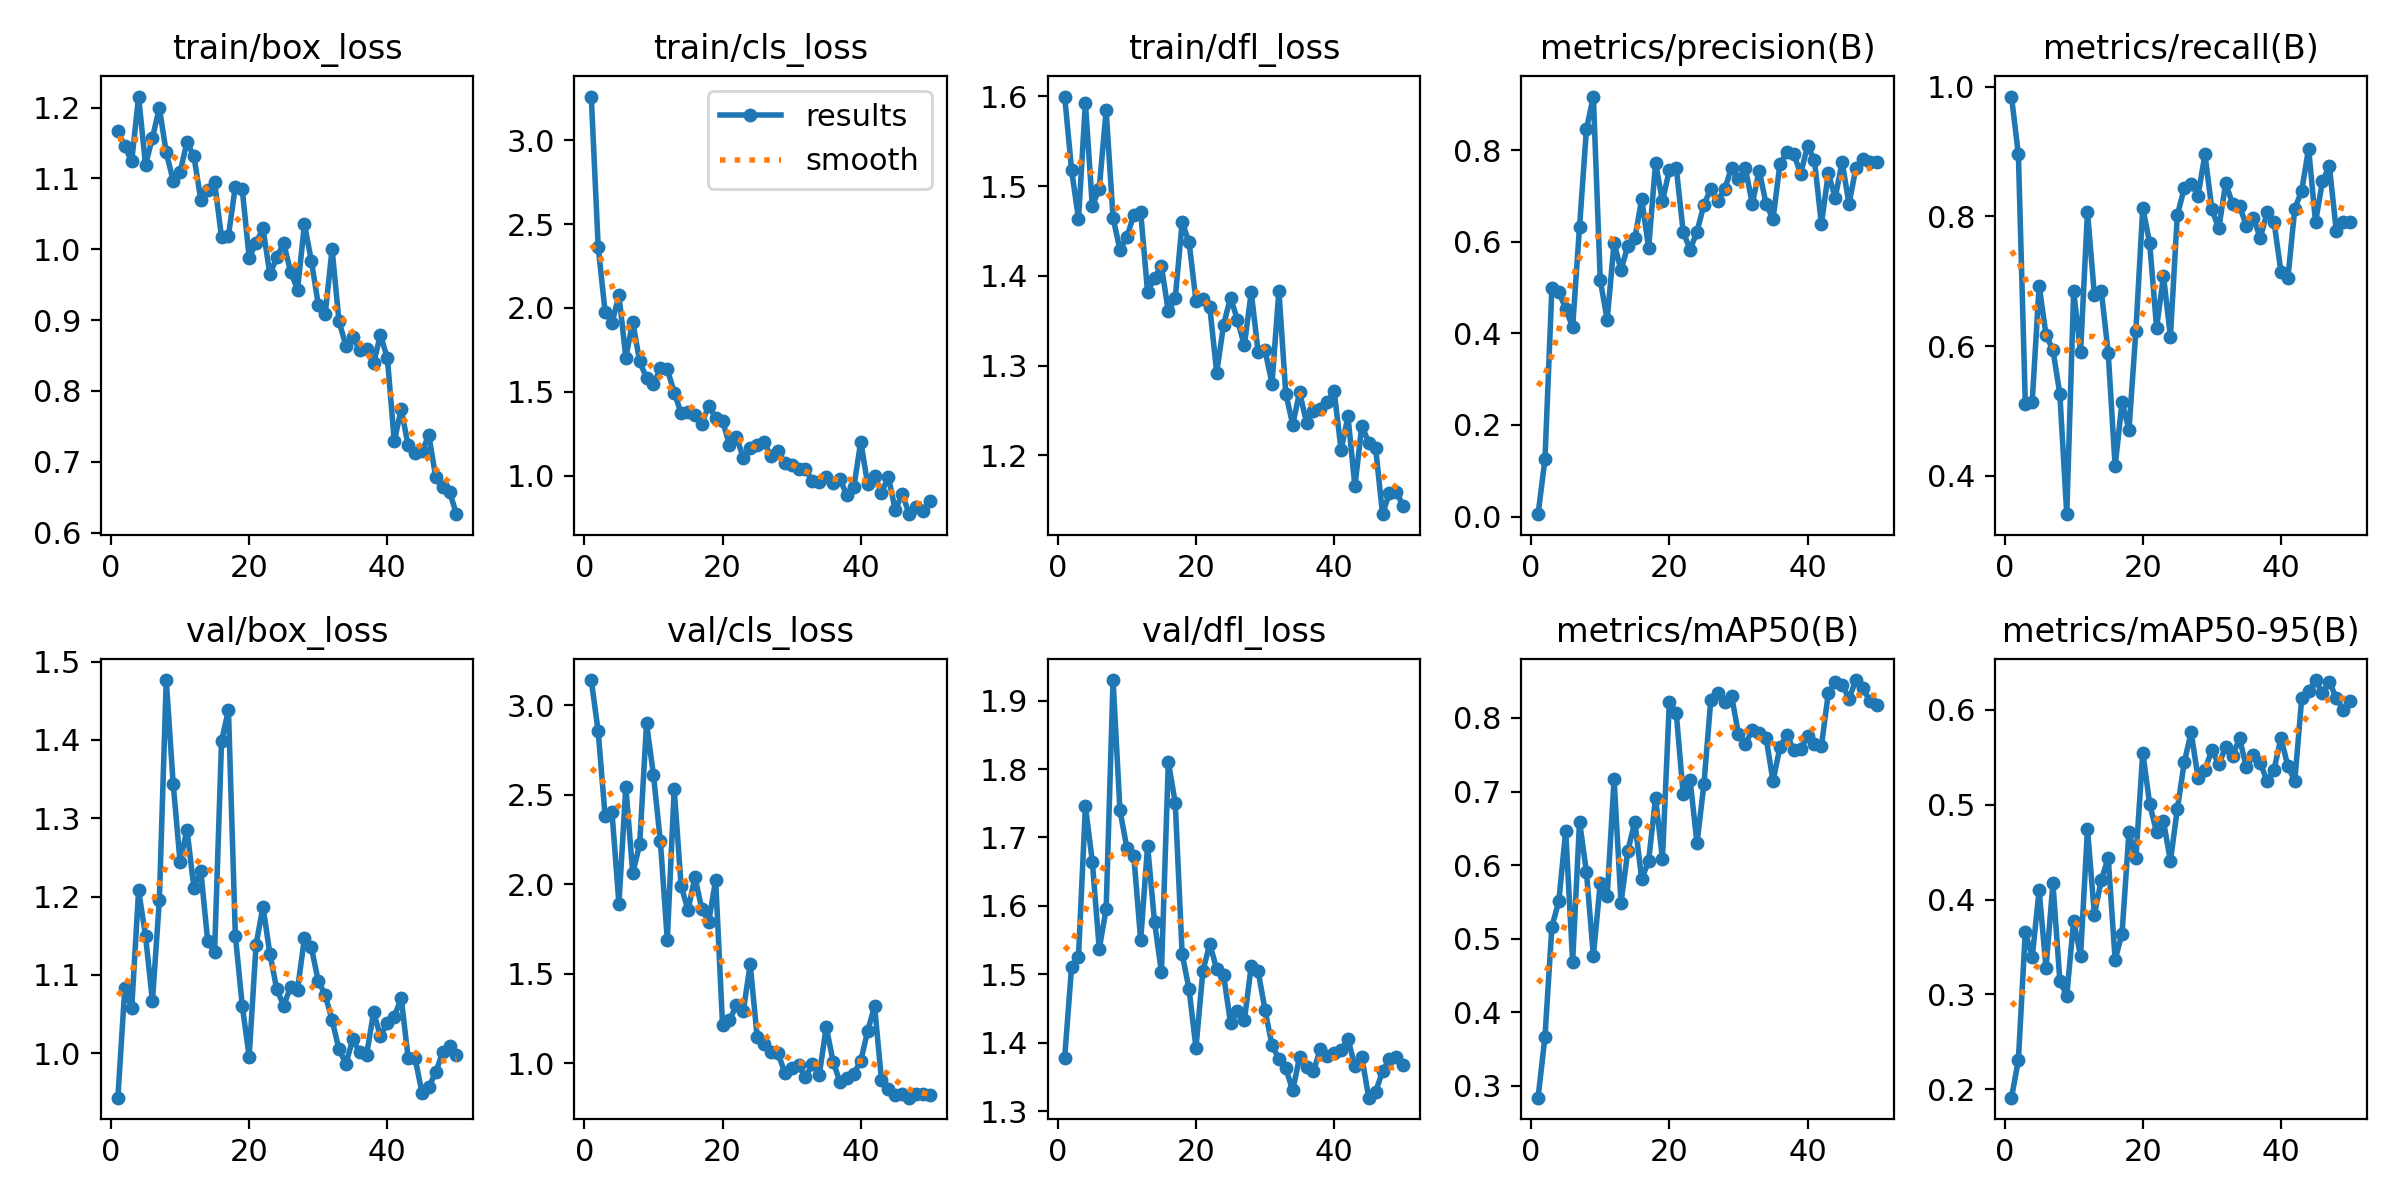

In [6]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/detect/train/results.png', width=800)

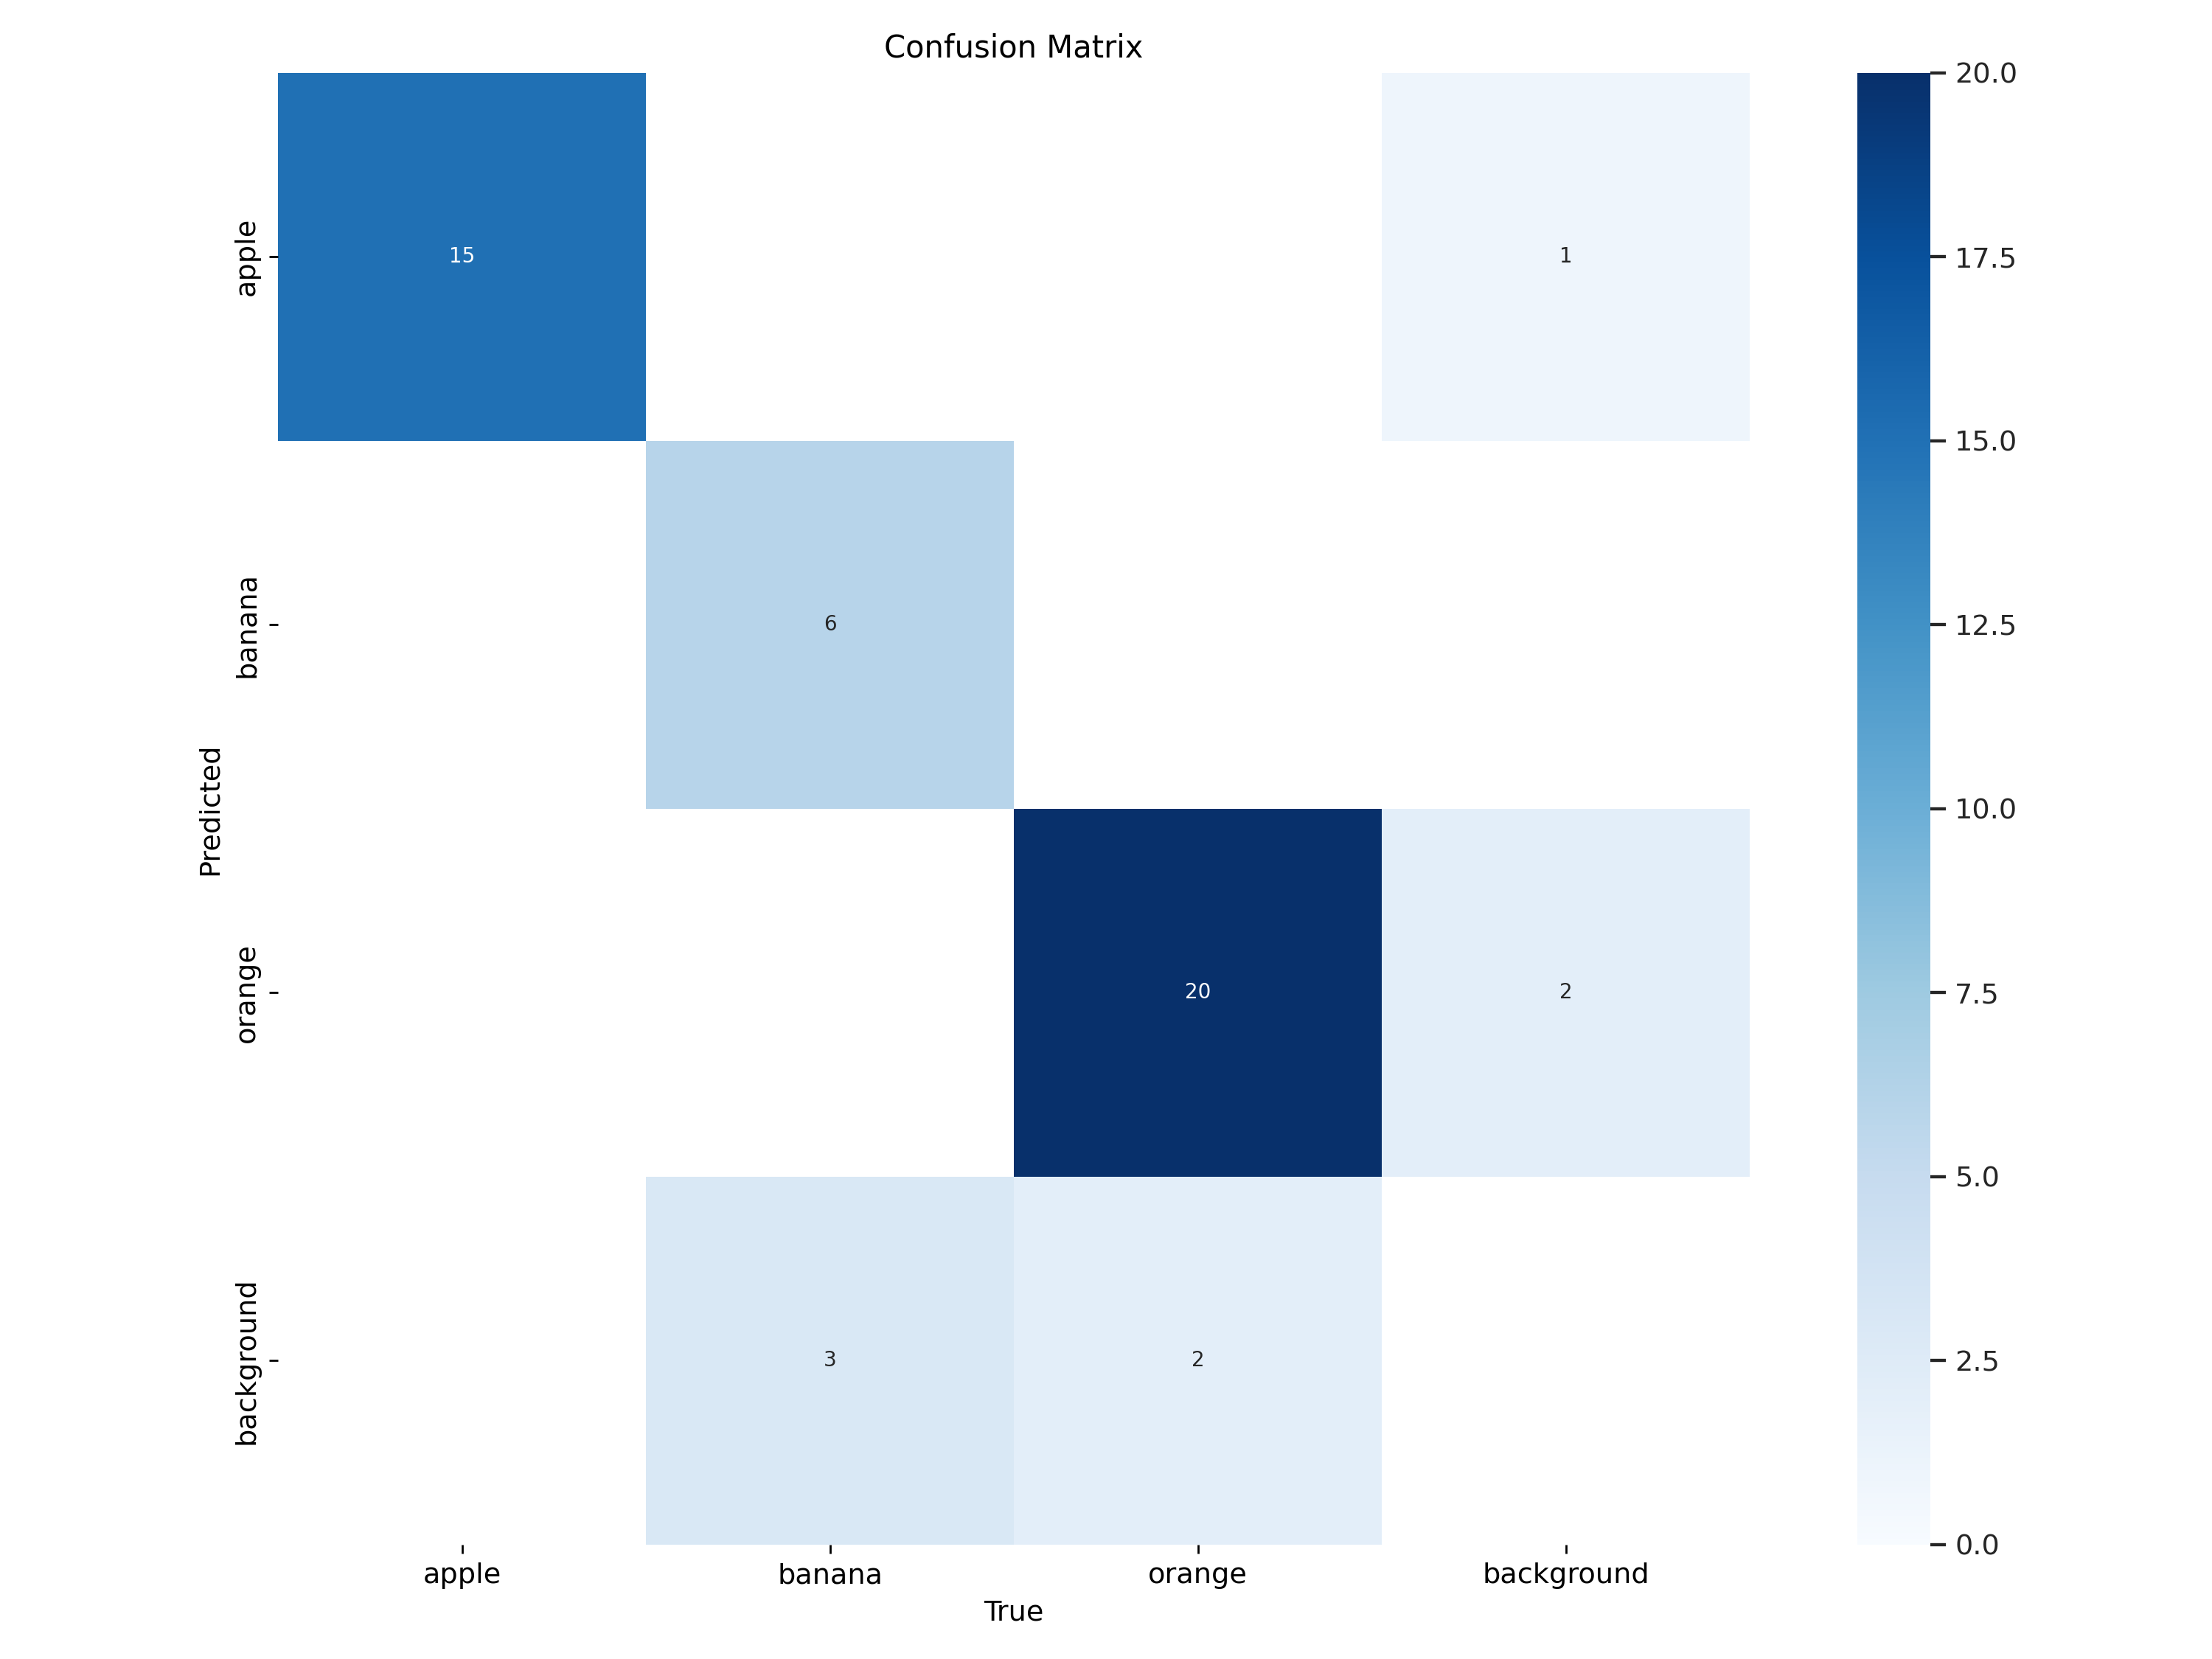

In [7]:
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', width=800)


image 1/1 /kaggle/working/Fruits-Detection-2/test/images/apple_92_jpg.rf.93d9b59d440ccd647a3223a5a1381720.jpg: 640x640 1 apple, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Predicted objects, all: ['1 apple, ']
Speed: {'preprocess': 2.3894309997558594, 'inference': 11.087894439697266, 'postprocess': 1.51824951171875}
---
Object type: apple
Coordinates: [62, 90, 575, 563]
Probability: 0.9
---
Speed: {'preprocess': 2.3894309997558594, 'inference': 11.087894439697266, 'postprocess': 1.51824951171875}

image 1/1 /kaggle/working/Fruits-Detection-2/test/images/banana_7_jpg.rf.c0c5e6047b67ffa7286fbb69d5cbf741.jpg: 640x640 2 bananas, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Predicted objects, all: ['1 banana, ']
Speed: {'preprocess': 1.6469955444335938, 'inference': 7.368326187133789, 'postprocess': 1.2679100036621094}
---
Predicted objects, all: ['1 banana, ', '1 banana, ']

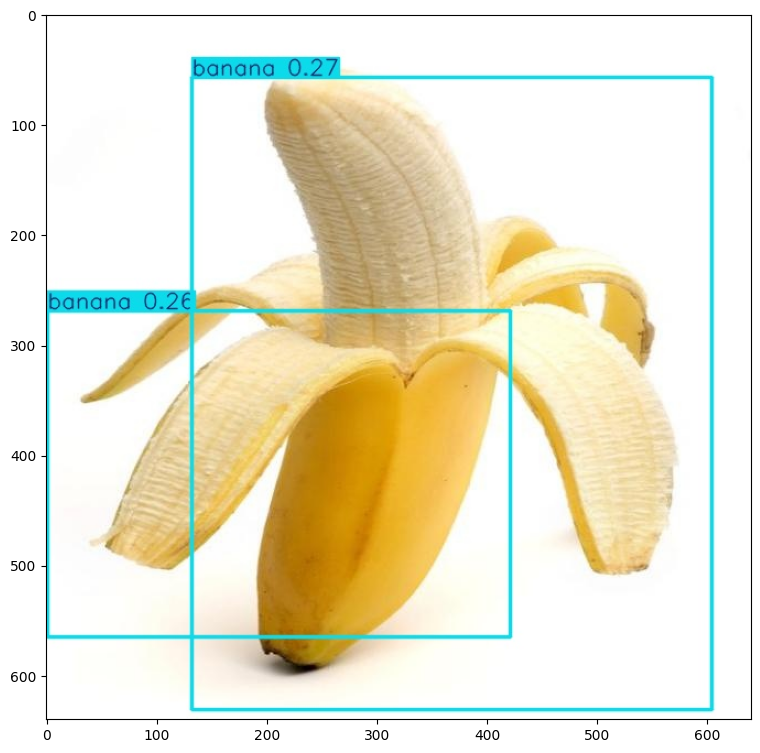

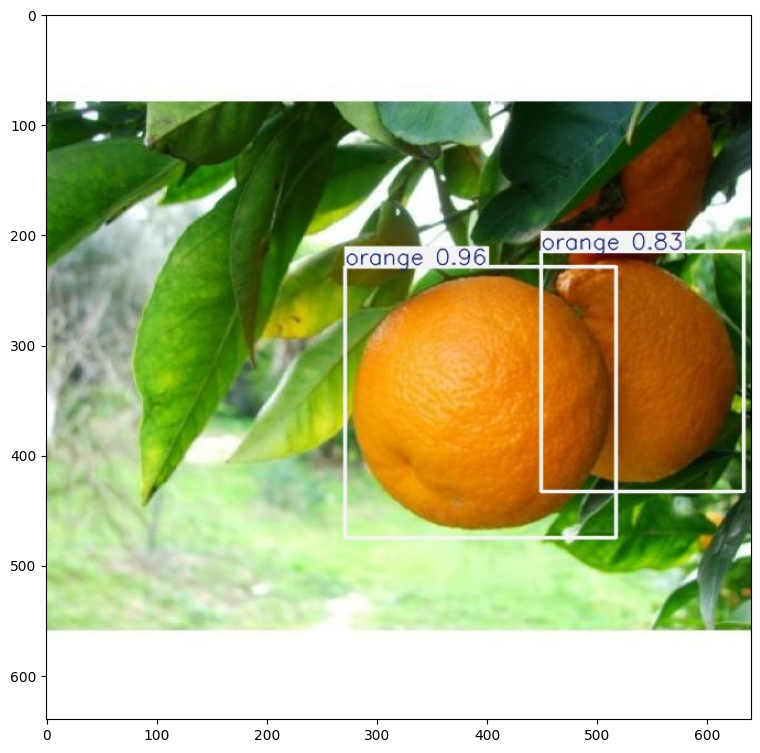

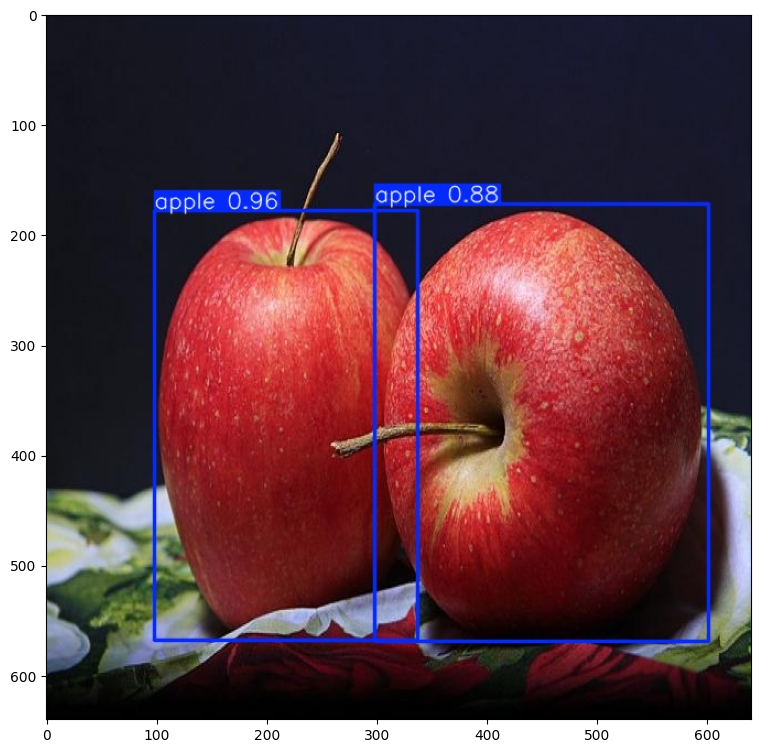

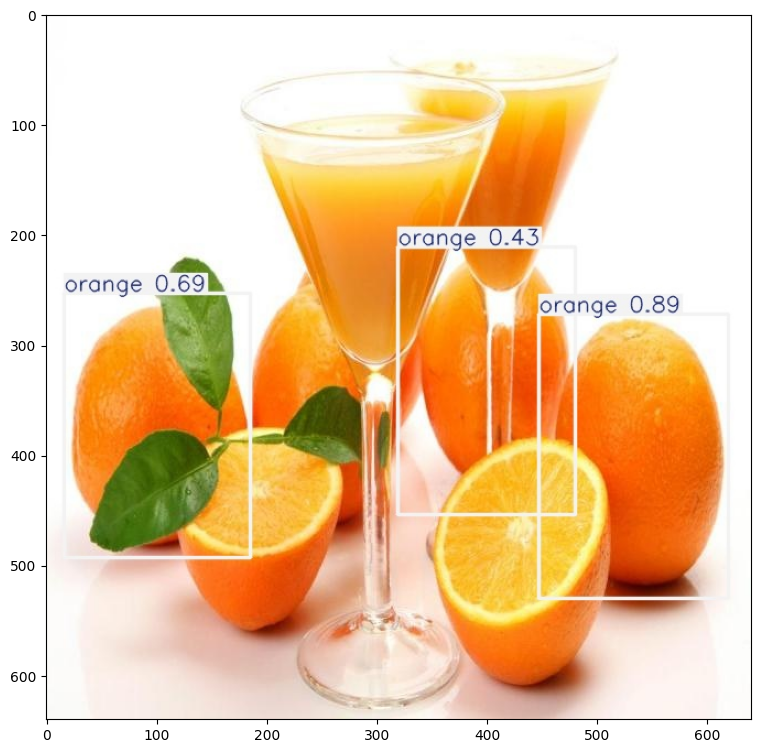

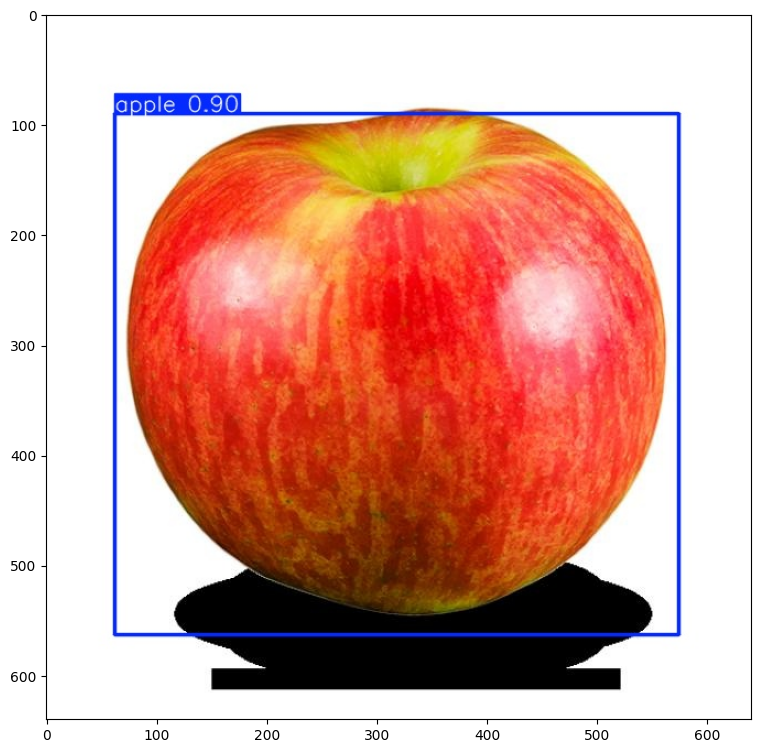

In [10]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

img_pred = []

img = [
    '/kaggle/working/Fruits-Detection-2/test/images/apple_92_jpg.rf.93d9b59d440ccd647a3223a5a1381720.jpg',
    '/kaggle/working/Fruits-Detection-2/test/images/banana_7_jpg.rf.c0c5e6047b67ffa7286fbb69d5cbf741.jpg',
    '/kaggle/working/Fruits-Detection-2/test/images/orange_69_jpg.rf.141617d1a0b73bdc1af77be9b747d0f6.jpg',
    '/kaggle/working/Fruits-Detection-2/test/images/apple_21_jpg.rf.df8650eaf2f5c8931856b90edccef5e4.jpg',
    '/kaggle/working/Fruits-Detection-2/test/images/orange_52_jpg.rf.0faeb10bea4b6cbd7255ffb7ee3f1b2f.jpg',
]

for i in range(len(img)):
    results = model.predict(img[i])
    result = results[0]
    img_pred.append(result)
    
    pr_obj = []
    for r in result:
        pr_obj.append(r.verbose())
        print(f'Predicted objects, all: {pr_obj}')
        print(f'Speed: {r.speed}')
        print("---")

    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")
        print(f'Speed: {result.speed}')

    im_bgr = result.plot()
    im_rgb = Image.fromarray(im_bgr[..., ::-1])
    result.save(filename=f"/kaggle/working/result_{i}.jpg")

src = '/kaggle/working/'
files = os.listdir(src)

for idx, image_src in enumerate(files):
    if os.path.isfile(os.path.join(src, image_src)) and image_src.lower().endswith('.jpg'):
        image = Image.open(os.path.join(src, image_src), "r")
        plt.figure(figsize=(20, 50))
        plt.subplot(4, 2, idx + 1)
        plt.imshow(image)

plt.show()